## Milestone 1

### Introduction
A problem that I often run into when browsing online retailers for any number of items is that the recommended or similar items often feel like they wander a little too far away from the original item to be of interest. This is especially true with creative work like movies, video games, or books, where often the recommendations will provide only a broad genre or creator connection.  One significant windfall that these types of products provide is that they tend to have a significant presence of reviews and personally opinions posted on relative web sites.  Movies and TV shows have user reviews posted on Rotten Tomatoes, and even web sites like Metacritic congregate the reviews of many mediums of entertainment.  

I want to create a model that can utilize the user review information for media like this to provide more informed recommendations when looking for similar content.  Ideally this will be extendable to cover a variety of types of media and recommend content across all of them.  In an effort to create this system in a scalable manner, I chose one to test out the viability of in this project.  Of the available options I chose to move forward with a database of reviews and information on tabletop board games.  The entry that I will be using from Kaggle.net will provide a rather sizable sample of user reviews for these games that I can use to train and test the model.  Additionally, the dataset provides a significant number of potential features that can be used to help predict a game’s favorability.  In addition to analyzing user sentiment towards different games, we can utilize user specific ratings to determine a correlation between games and the users that enjoy them.

### Dataset
https://www.kaggle.com/datasets/jvanelteren/boardgamegeek-reviews

### EDA

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ast import literal_eval

This first section mostly entails removing unnessecary data to make manipulation of the data sets a little more managable.  One big performance booster was to remove the review data that did not contain a comment as that is a significant factor in our reccomendation model.

In [10]:
reviews_df = pd.read_csv("bgg-19m-reviews.csv")
reviews_df.sample(10)

,Unnamed: 0,user,rating,comment,ID,name
7779799,7779799,halfcrazy113,8.0,NaN,1111,Taboo
4289683,4289683,EndelNurk,9.0,NaN,166384,Spyfall
778943,778943,steelvenom27,7.0,NaN,181,Risk
5408101,5408101,JoeDarts317,7.0,Excellent coop game for all ages.,100901,Flash Point: Fire Rescue
15618994,15618994,Belisario Nikeforos,9.0,NaN,41627,Zulus on the Ramparts!: The Battle of Rorke's ...
13760209,13760209,m_zdrojek,5.0,NaN,86073,5 Second Rule
454836,454836,Steerpike.Instance,8.0,NaN,15062,Shadows over Camelot
838731,838731,Kryston,8.0,NaN,194655,Santorini
7748920,7748920,Oj0 Poderoso,9.0,NaN,17226,Descent: Journeys in the Dark
7334559,7334559,pawl24,6.0,NaN,83330,Mansions of Madness


In [14]:
reviews_df = reviews_df.dropna(subset=['comment'])
reviews_df = reviews_df.drop(axis=1, columns="Unnamed: 0")
reviews_df.shape

(3368619, 5)

In [138]:
reviews_df.describe()

,rating,ID
count,3.368619e+06,3.368619e+06
mean,6.905662e+00,9.135394e+04
std,1.785285e+00,9.121462e+04
min,1.401300e-45,1.000000e+00
25%,6.000000e+00,7.349000e+03
50%,7.000000e+00,5.086200e+04
75%,8.000000e+00,1.663840e+05
max,1.000000e+01,3.509920e+05


In [62]:
board_games_df = pd.read_csv("games_detailed_info.csv")
board_games_df = board_games_df.drop(axis=1, columns="Unnamed: 0")
board_games_df.sample(10)

C:\Users\Gabe\AppData\Local\Temp\ipykernel_25996\2960143567.py:1: DtypeWarning: Columns (29,48) have mixed types. Specify dtype option on import or set low_memory=False.
  board_games_df = pd.read_csv("games_detailed_info.csv")


,type,id,thumbnail,image,primary,alternate,description,yearpublished,minplayers,maxplayers,...,War Game Rank,Customizable Rank,Children's Game Rank,RPG Item Rank,Accessory Rank,Video Game Rank,Amiga Rank,Commodore 64 Rank,Arcade Rank,Atari ST Rank
1204,boardgame,33451,https://cf.geekdo-images.com/XRkJWhibYJow3TSx6...,https://cf.geekdo-images.com/XRkJWhibYJow3TSx6...,The Red Dragon Inn 2,"['Zum Blauen Drachen', 'Таверна «Красный драко...",The Red Dragon Inn 2 is a standalone game that...,2008,2,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10678,boardgame,7493,https://cf.geekdo-images.com/HruLdajgclOYOqBzR...,https://cf.geekdo-images.com/HruLdajgclOYOqBzR...,Caves & Claws,['Caves and Claws'],From the Box:&#10;&#10;The museum hires a team...,1998,1,4,...,NaN,NaN,413.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4475,boardgame,181811,https://cf.geekdo-images.com/i4ATT7q0Mg4inm6Wh...,https://cf.geekdo-images.com/i4ATT7q0Mg4inm6Wh...,Tatsu,['타쑤'],Tatsu is a two-player game in which players co...,2016,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15267,boardgame,21987,https://cf.geekdo-images.com/h89gbp5iiQmzHbz6k...,https://cf.geekdo-images.com/h89gbp5iiQmzHbz6k...,Doktor Schlüsselbart,"['Doctor Key-Bit', 'Doktor Klucznik']",DOCTOR KEY-BIT is proof that even the best mag...,2006,2,5,...,NaN,NaN,271.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12401,boardgame,163478,https://cf.geekdo-images.com/r8VZtWih_9f8Njl9k...,https://cf.geekdo-images.com/r8VZtWih_9f8Njl9k...,Lunte,['Get Lit!'],"In Lunte, signed from a 2012/2013 game author'...",2014,3,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2510,boardgame,164840,https://cf.geekdo-images.com/BH5gxOe_ozOtWihuC...,https://cf.geekdo-images.com/BH5gxOe_ozOtWihuC...,Monopoly Deal,['Monopoly Deal Pocket'],From the back of the box:&#10;&#10;Fast-dealin...,2014,2,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6401,boardgame,147241,https://cf.geekdo-images.com/SBGExkbKV5prvb6KA...,https://cf.geekdo-images.com/SBGExkbKV5prvb6KA...,Oaxaca: Crafts of a Culture,['Oaxaca'],Among the many reasons that Oaxaca (pronounced...,2018,1,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1315,boardgame,7688,https://cf.geekdo-images.com/vDo4qdmjMC0KqHEVu...,https://cf.geekdo-images.com/vDo4qdmjMC0KqHEVu...,Memory,"['1 x1 memory', '50 Jahre memory (1959 bis 200...",First published in today's form by Ravensburge...,1959,2,6,...,NaN,NaN,838.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9186,boardgame,2946,https://cf.geekdo-images.com/qW51Q3WfoNtNpslBh...,https://cf.geekdo-images.com/qW51Q3WfoNtNpslBh...,Pipeline,"['Pipes', 'Putkimies', 'Rörmakaren', 'Round Th...",Pipeline is a surprisingly fun 3D pipe laying ...,1993,2,4,...,NaN,NaN,526.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6281,boardgame,39798,https://cf.geekdo-images.com/ilviSDNEUrQKLOYFq...,https://cf.geekdo-images.com/ilviSDNEUrQKLOYFq...,Deadlands: The Battle for Slaughter Gulch,['Deadlands: Weird West Board Game'],Deadlands: The Battle for Slaughter Gulch&#10;...,2009,2,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
board_games_df.describe()

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,usersrated,average,owned,trading,wanting,wishing,numcomments
count,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000,21631.000000
mean,118133.093847,1986.094910,2.007027,5.709491,90.509177,63.647774,90.509177,9.611391,875.000693,6.417127,1487.924553,43.585965,42.030373,233.655587,213.221811
std,105310.419253,210.042496,0.688957,15.102385,534.826511,447.213702,534.826511,3.640562,3697.681390,0.929178,5395.077773,102.410851,117.940355,800.657809,674.130830
min,1.000000,-3500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29.000000,1.041330,0.000000,0.000000,0.000000,0.000000,1.000000
25%,12280.500000,2001.000000,2.000000,4.000000,25.000000,20.000000,25.000000,8.000000,57.000000,5.832710,150.000000,5.000000,3.000000,14.000000,24.000000
50%,105187.000000,2011.000000,2.000000,4.000000,45.000000,30.000000,45.000000,10.000000,124.000000,6.446360,322.000000,13.000000,9.000000,39.000000,51.000000
75%,207013.000000,2017.000000,2.000000,6.000000,90.000000,60.000000,90.000000,12.000000,397.000000,7.039515,903.500000,38.000000,29.000000,131.000000,138.000000
max,350992.000000,2023.000000,10.000000,999.000000,60000.000000,60000.000000,60000.000000,25.000000,109006.000000,9.568290,168364.000000,2508.000000,2011.000000,19325.000000,19402.000000


In [64]:
board_games_df = board_games_df.drop(columns=[ 'thumbnail', 'boardgameexpansion', 'boardgameimplementation', 'bayesaverage','Strategy Game Rank', 'Family Game Rank', 'stddev', 'median', 'numweights',
       'averageweight', 'boardgameintegration', 'boardgamecompilation',
       'Party Game Rank', 'Abstract Game Rank', 'Thematic Rank',
       'War Game Rank', 'Customizable Rank', "Children's Game Rank",
       'RPG Item Rank', 'Accessory Rank', 'Video Game Rank', 'Amiga Rank',
       'Commodore 64 Rank', 'Arcade Rank', 'Atari ST Rank', 'suggested_num_players', 'image'])

In [65]:
board_games_df.isna().sum()

type                                 0
id                                   0
primary                              0
alternate                        12781
description                          1
yearpublished                        0
minplayers                           0
maxplayers                           0
suggested_playerage                111
suggested_language_dependence       72
playingtime                          0
minplaytime                          0
maxplaytime                          0
minage                               0
boardgamecategory                  283
boardgamemechanic                 1590
boardgamefamily                   3761
boardgamedesigner                  596
boardgameartist                   5907
boardgamepublisher                   1
usersrated                           0
average                              0
Board Game Rank                      0
owned                                0
trading                              0
wanting                  

In [66]:
corr_matrix = board_games_df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,id,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,usersrated,average,owned,trading,wanting,wishing,numcomments
id,1.000000,0.103923,-0.136860,0.016726,-0.029830,-0.052566,-0.029830,0.100057,-0.018260,0.400195,0.003438,-0.081131,0.068131,0.096976,-0.064944
yearpublished,0.103923,1.000000,-0.008847,-0.003830,0.008524,0.004769,0.008524,0.093028,0.008392,0.079102,0.013377,0.026470,0.035227,0.029205,0.002539
minplayers,-0.136860,-0.008847,1.000000,0.079731,0.016071,0.043760,0.016071,0.036387,-0.012549,-0.176669,-0.022870,0.000562,-0.091653,-0.082098,-0.013883
maxplayers,0.016726,-0.003830,0.079731,1.000000,-0.008161,-0.006525,-0.008161,0.008734,-0.002417,-0.041245,-0.001850,-0.009672,-0.018798,-0.011776,-0.006067
playingtime,-0.029830,0.008524,0.016071,-0.008161,1.000000,0.856547,1.000000,0.042785,-0.004395,0.093456,-0.002677,-0.005495,0.018374,0.009943,0.000296
minplaytime,-0.052566,0.004769,0.043760,-0.006525,0.856547,1.000000,0.856547,0.035942,-0.004539,0.040522,-0.004014,-0.002616,0.008411,0.001927,-0.000692
maxplaytime,-0.029830,0.008524,0.016071,-0.008161,1.000000,0.856547,1.000000,0.042785,-0.004395,0.093456,-0.002677,-0.005495,0.018374,0.009943,0.000296
minage,0.100057,0.093028,0.036387,0.008734,0.042785,0.035942,0.042785,1.000000,0.071819,0.191268,0.080627,0.127114,0.148398,0.133330,0.084022
usersrated,-0.018260,0.008392,-0.012549,-0.002417,-0.004395,-0.004539,-0.004395,0.071819,1.000000,0.169681,0.985525,0.809494,0.709240,0.812863,0.973480
average,0.400195,0.079102,-0.176669,-0.041245,0.093456,0.040522,0.093456,0.191268,0.169681,1.000000,0.178058,0.126233,0.330753,0.288076,0.178329


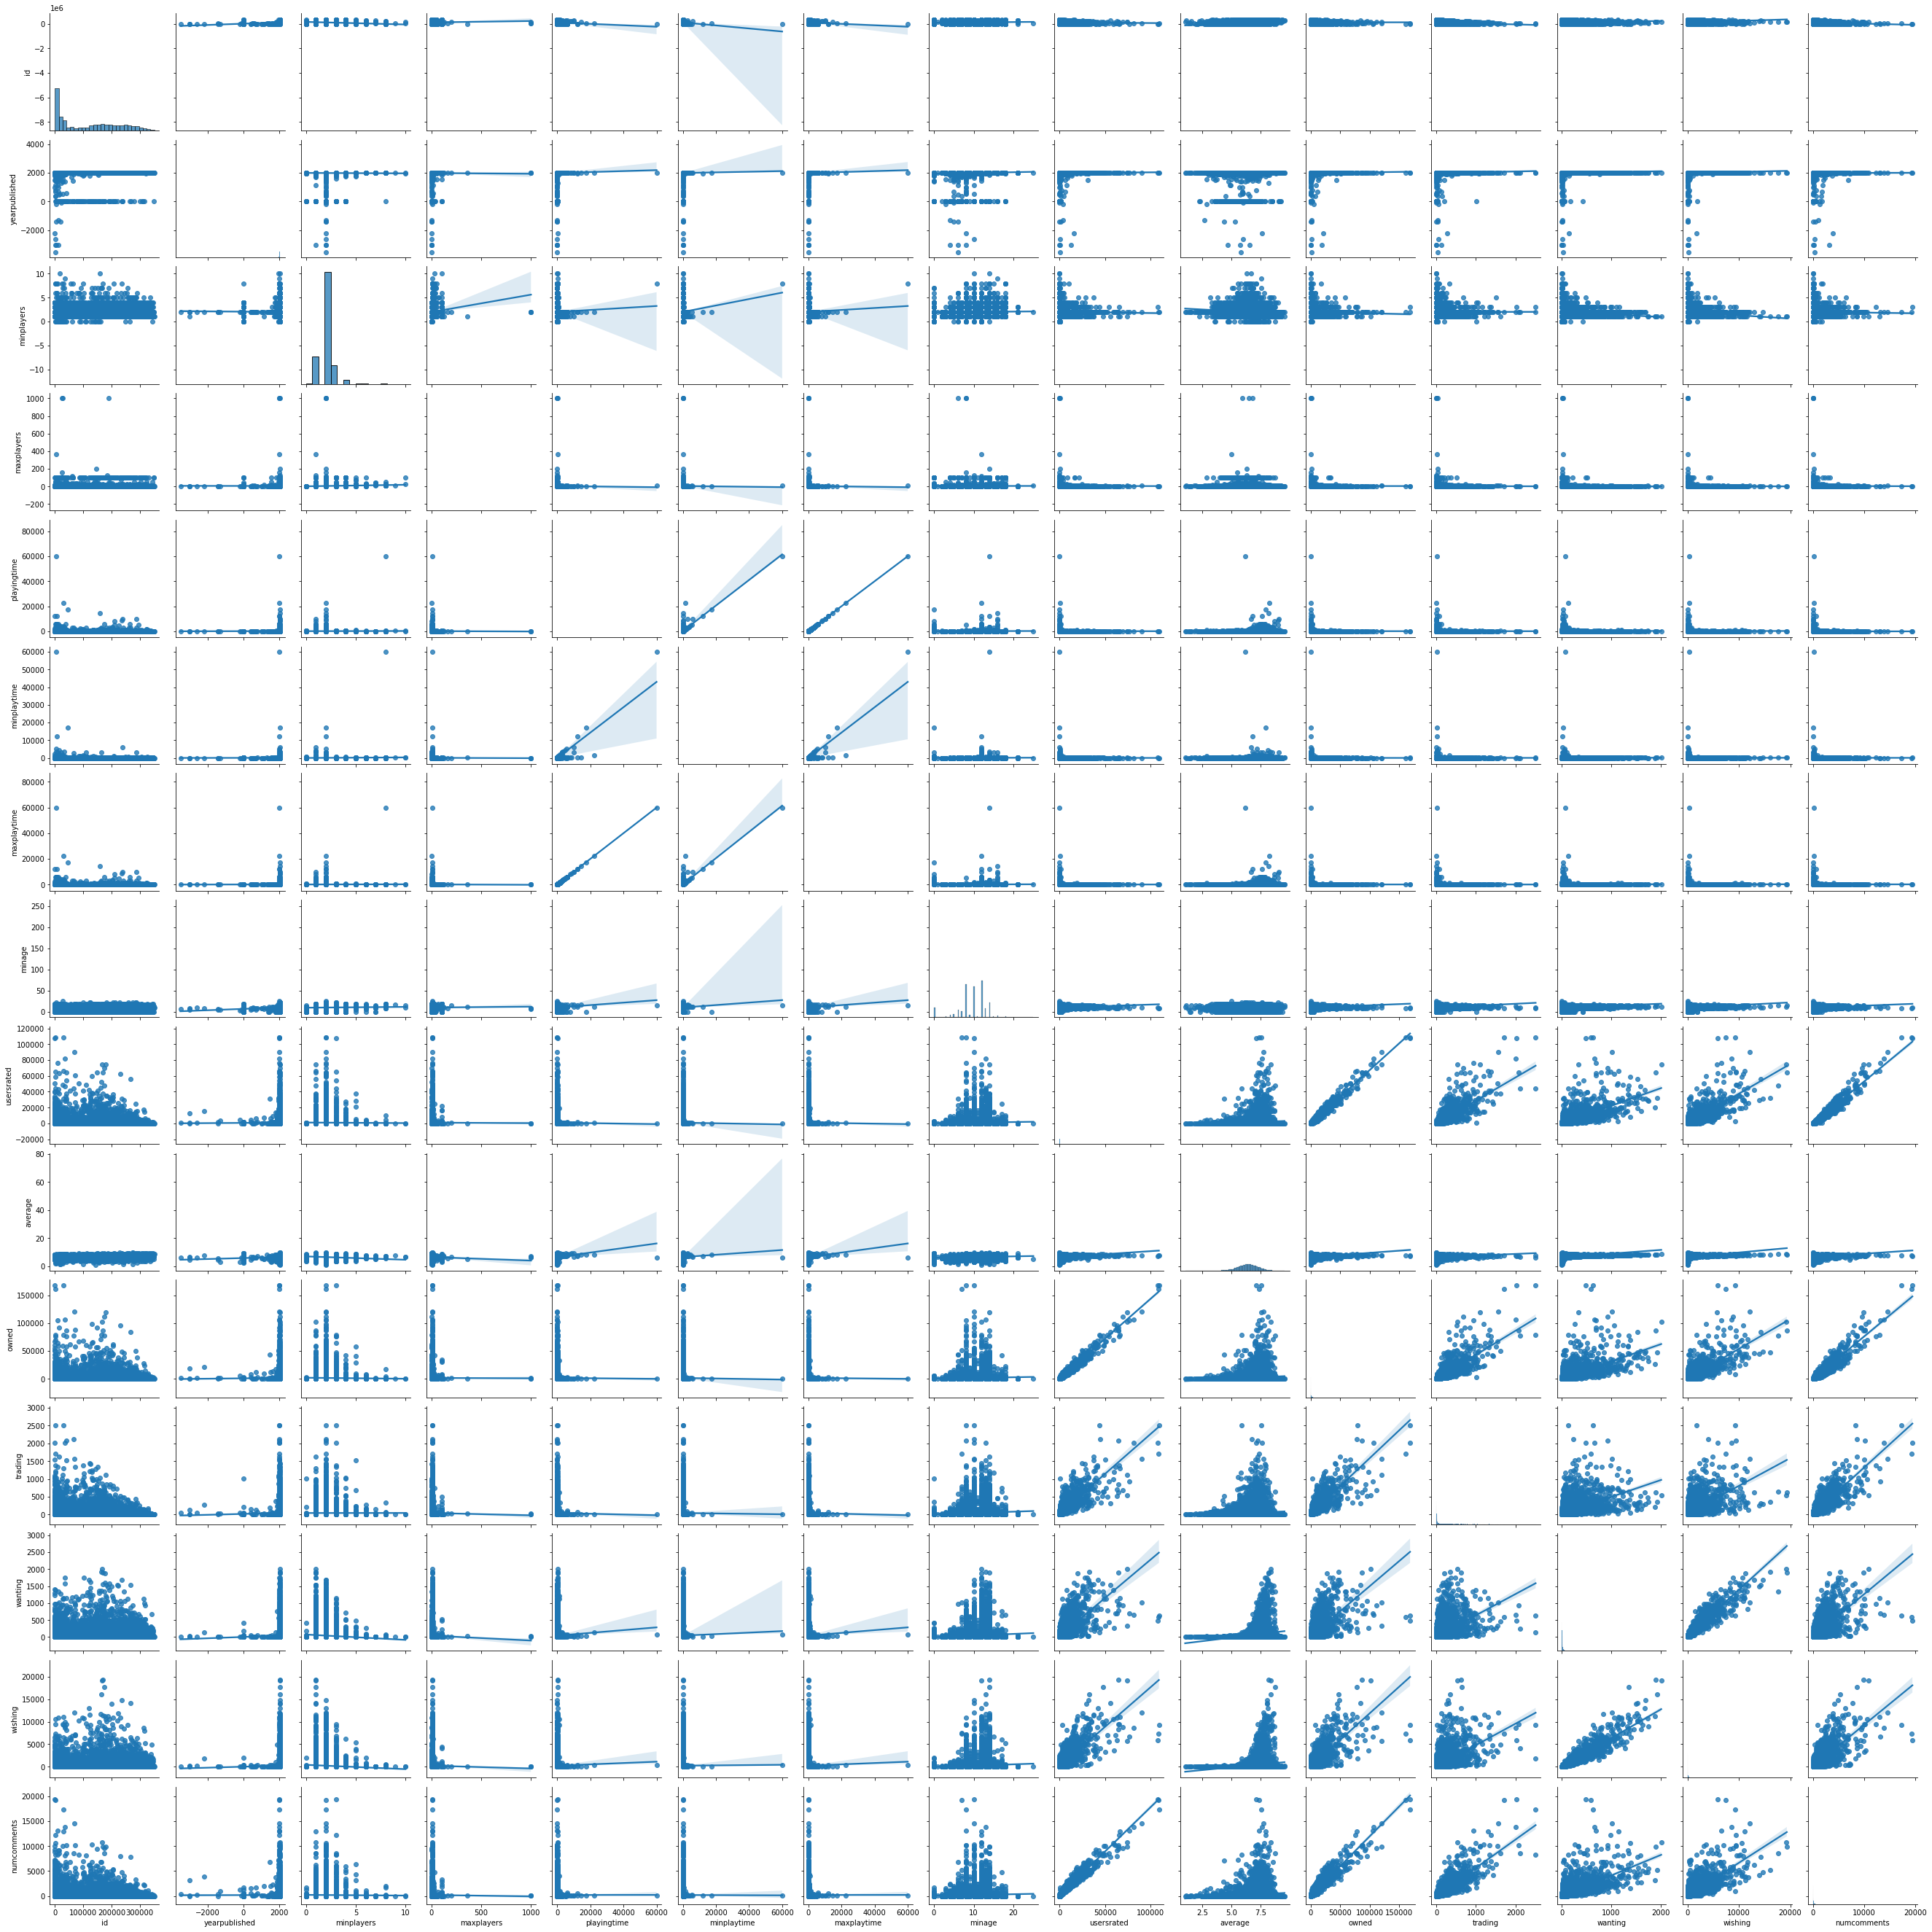

In [70]:
sns.pairplot(board_games_df, kind="reg")
plt.show()

In an attempt to quickly find some correlation with the numerical data in this set, I threw together a few visualizations utilizint correlation matrices.

<AxesSubplot:xlabel='average', ylabel='Count'>

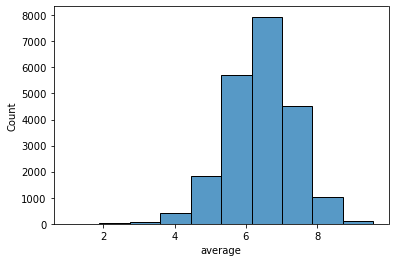

In [67]:
sns.histplot(board_games_df.average, bins=10)

This is a simple histogram of the average user rating to help detemermine where to best create a cutoff for mostly positive of mostly negative reviews.

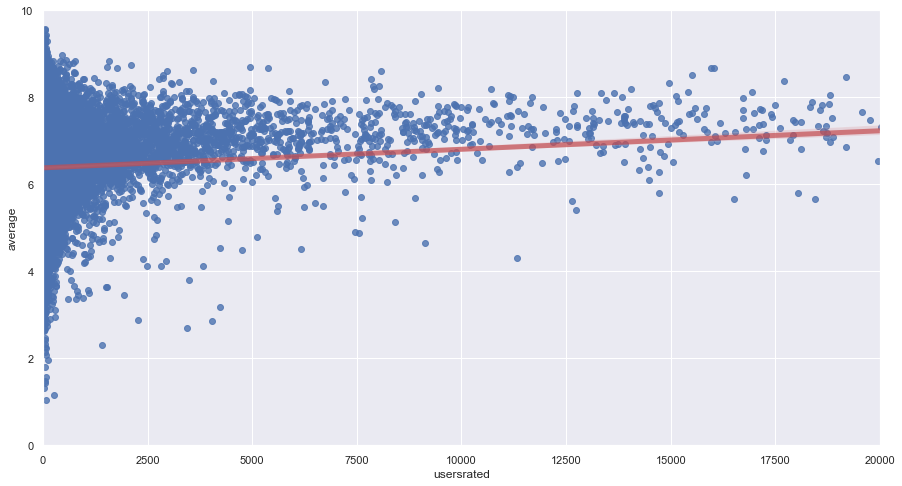

In [141]:
sns.regplot(x=board_games_df.usersrated, y=board_games_df.average, line_kws={"color":"r","alpha":0.7,"lw":5})
sns.set(rc={'figure.figsize':(15,8)})
plt.ylim(0, 10)
plt.xlim(0, 20000)
plt.show()

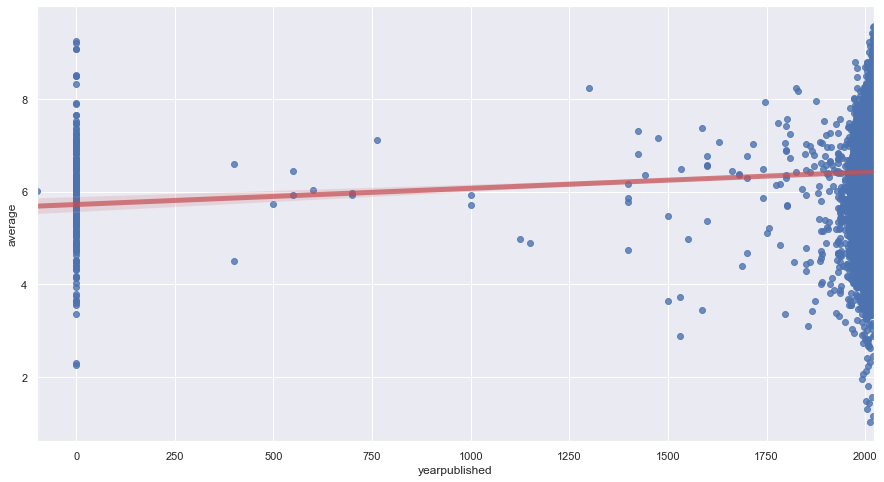

In [145]:
sns.regplot(x=board_games_df.yearpublished, y=board_games_df.average, line_kws={"color":"r","alpha":0.7,"lw":5})
sns.set(rc={'figure.figsize':(15,8)})
plt.xlim(-100, 2022)
plt.show()

To get a better look at some of the relationships between each column in the dataset I went ahead and created scatterplots with regression lines to better examine the potential trends.

In [106]:
board_games_df.boardgamecategory = board_games_df.boardgamecategory.dropna().apply(lambda x:  literal_eval(str(x)))
print(board_games_df.boardgamecategory.explode().value_counts())


Card Game                  6402
Wargame                    3820
Fantasy                    2681
Party Game                 1968
Dice                       1847
                           ... 
American Indian Wars         41
Game System                  29
Korean War                   26
Expansion for Base-game      24
Fan Expansion                 1
Name: boardgamecategory, Length: 84, dtype: int64


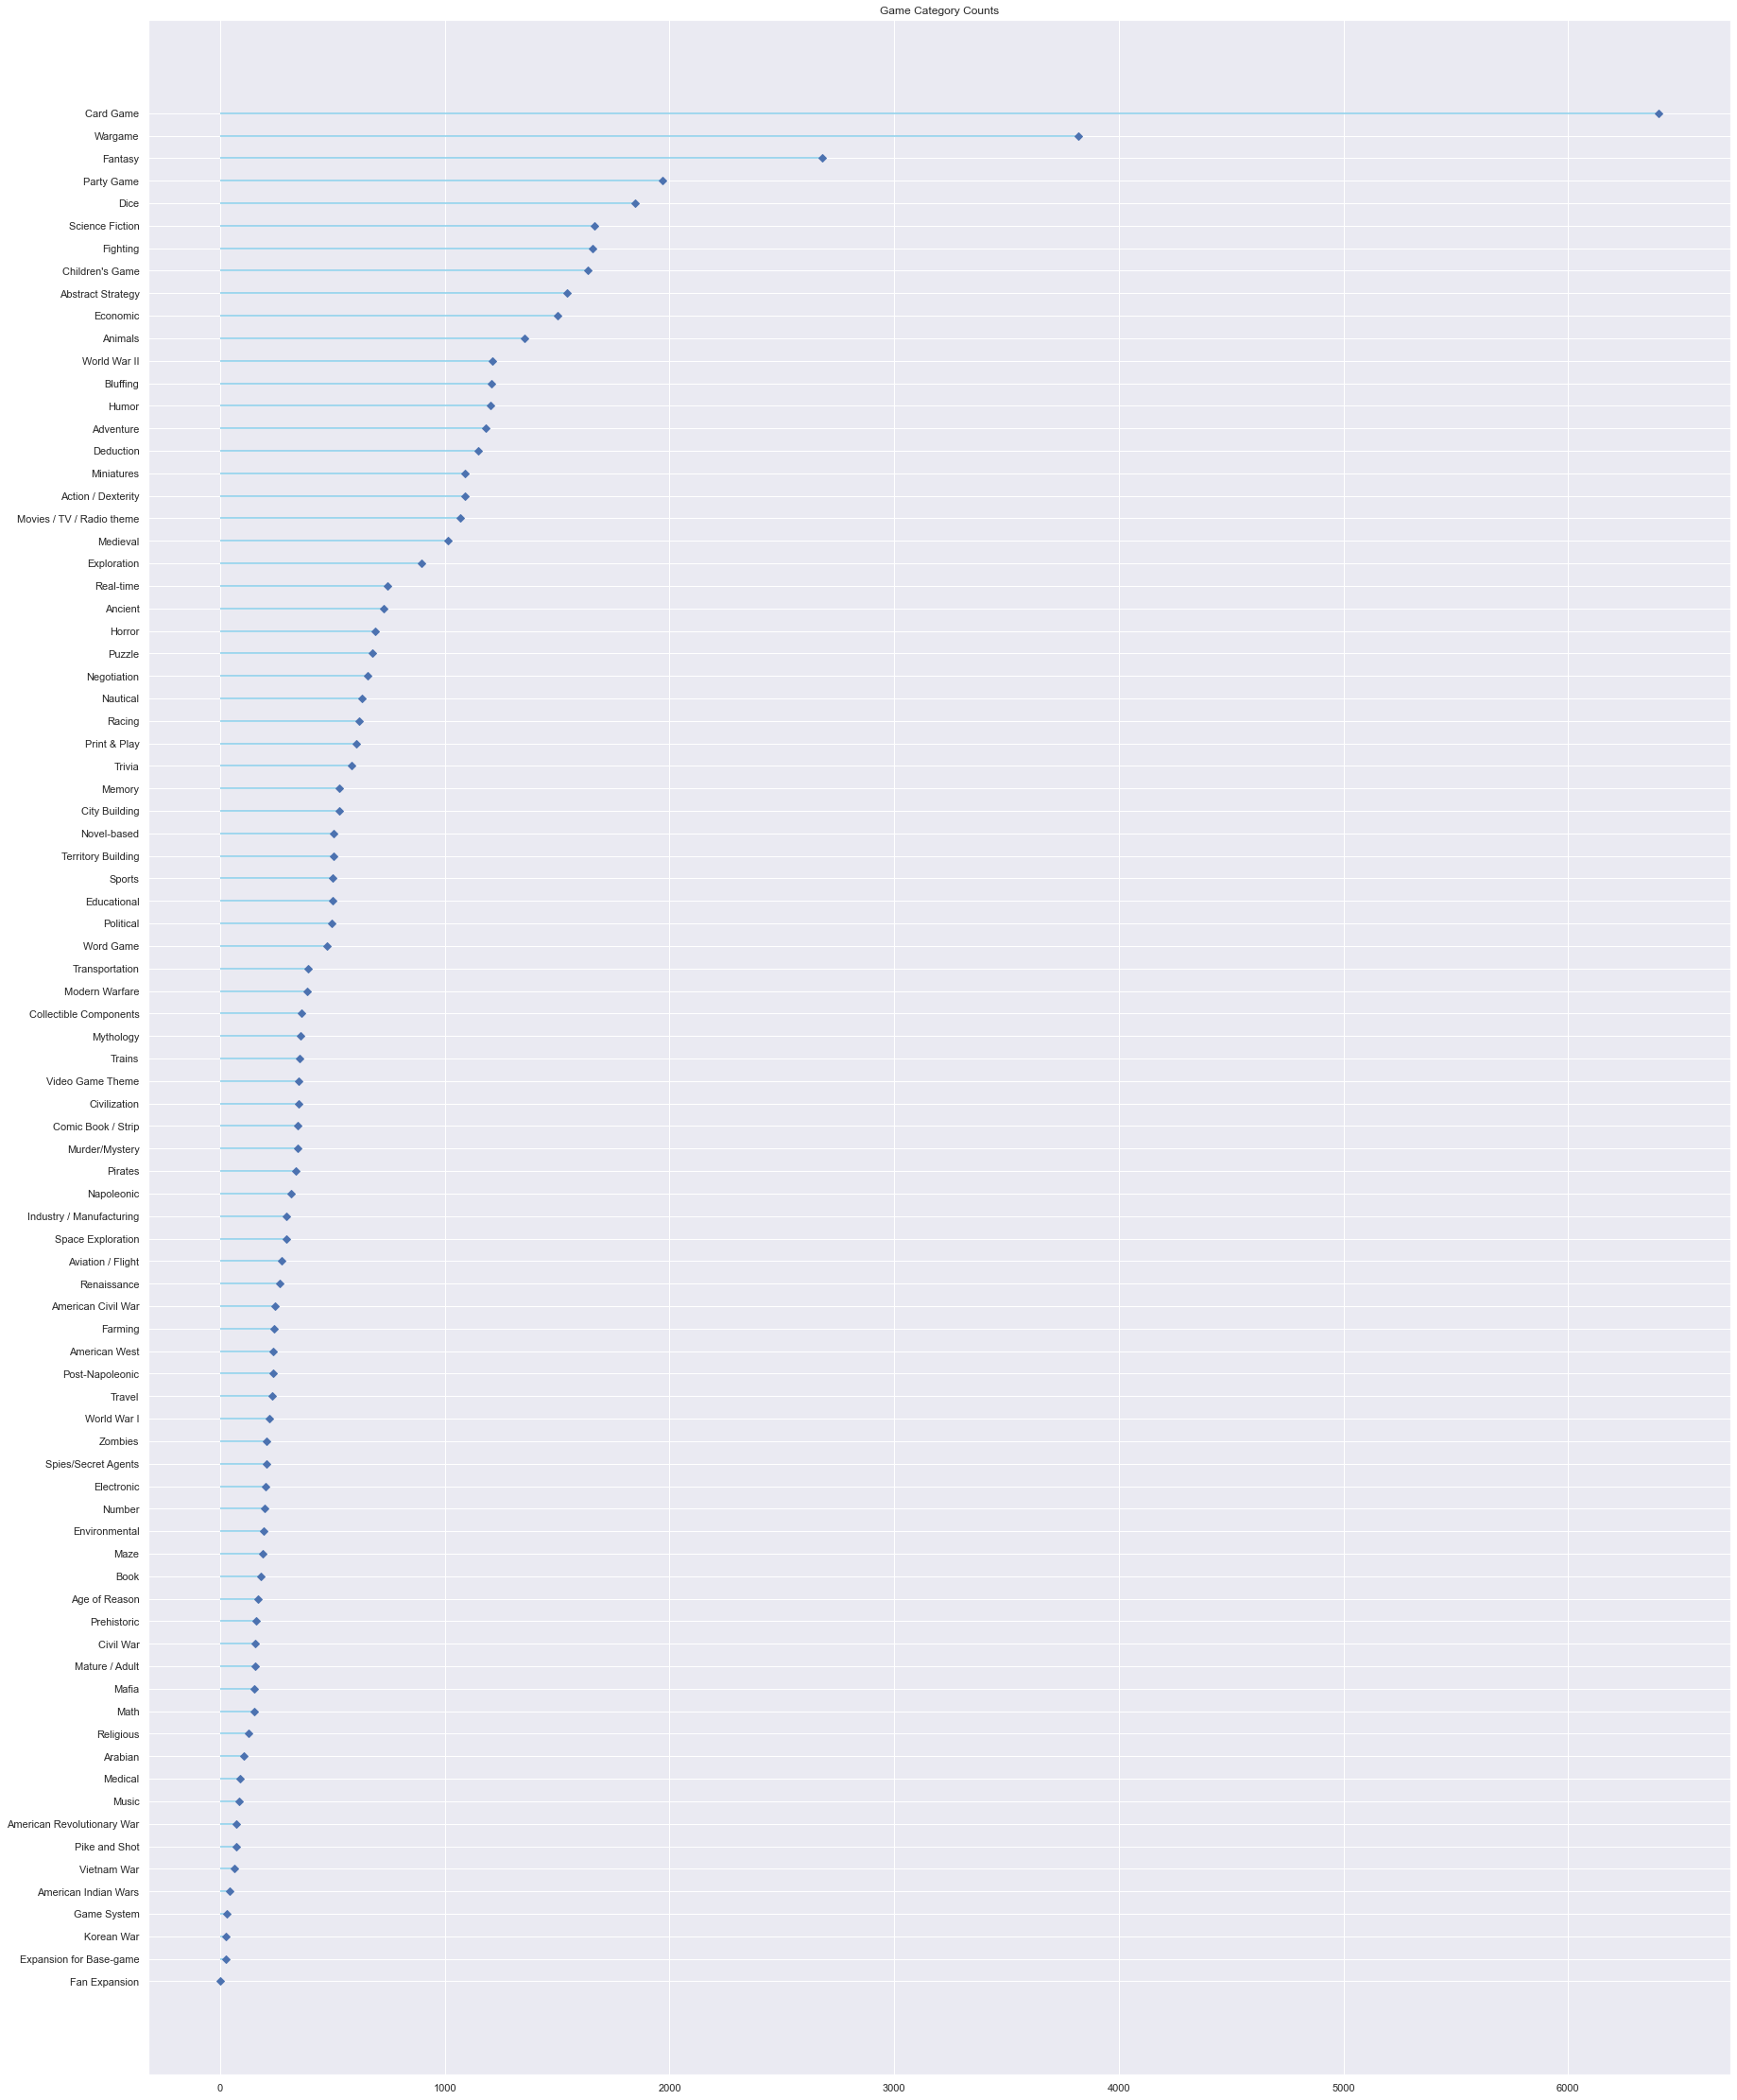

<Figure size 1296x576 with 0 Axes>

In [127]:
ordered_df = board_games_df.boardgamecategory.explode().value_counts().sort_values()
my_range=range(0,len(board_games_df.boardgamecategory.explode().value_counts()))

plt.hlines(y=my_range, xmin=0, xmax=ordered_df, color='skyblue')
plt.title("Game Category Counts")
plt.plot(ordered_df, my_range, "D")
plt.yticks(my_range, ordered_df.index)
plt.figure(figsize=(18, 8))
plt.show()

This visualization shows a proliferation of the cardgame and war game genres.  There are somewhat outliers in the categories of games and might need to be ignores to improve model accuracy.


### Conclusion
The main goal for my EDA was to determine if there were significant contributing factors that can help determine whether a game is reviewed positively or not.  I wasn’t able to find any significant correlation between average (the average user score) and any of the other elements.  This means that our model will rely heavily on the user sentiment from reviews and how we implement that when comparing games together.  Another goal of my EDA was to determine what rating would be considered positive and negative for the upcoming analysis.  We can use the mean of the average as the cutoff for positive reviews but will have to give less weight to games that contain fewer reviews.  They seem to have a much larger variance in user rating.